In [69]:
import pandas as pd                                         # type: ignore
import numpy as np                                          # type: ignore
import matplotlib.pyplot as plt                             # type: ignore                              
import seaborn as sns                                       # type: ignore       
import matplotlib                                           # type: ignore       
from matplotlib.colors import LinearSegmentedColormap       # type: ignore

In [2]:
df_pw25 = pd.read_csv('data/PTOPER_202210_PWF25_OPF.csv')
df_pw25['XING_TOT'] = df_pw25['XESTR_MW'] + df_pw25['XTRIO_MW']
df_pw16 = pd.read_csv('data/PTOPER_202210_PWF16_OPF.csv')
df_total = pd.concat([df_pw16, df_pw25.iloc[:, 2:]], axis=1)
df_total

,Dia,Hora,EXP_NEN,EXP_NESE,EXP_NE,EXP_SULSECO,EXP_NS,FOZIB_MW,PVLARRQ_MW,CPVPVL_MW,XESTR_MW,XTRIO_MW,XING_TOT
0,2,00:00,1532.4,5173.8,6706.2,1227.1,2214.6,3708.0,665.0,448.0,200.0,292.0,492.0
1,2,00:30,1672.2,4907.4,6579.6,1354.7,1997.7,3708.0,579.0,444.0,200.0,200.0,400.0
2,2,01:00,1999.5,4435.3,6434.8,1563.9,1307.4,3708.0,575.0,442.0,200.0,200.0,400.0
3,2,01:30,2312.9,3982.0,6294.9,1816.2,720.8,3708.0,1050.0,40.0,200.0,200.0,400.0
4,2,02:00,2260.5,3937.7,6198.2,1914.6,795.5,3708.0,896.0,40.0,200.0,200.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,29,21:30,4611.2,4874.3,9485.5,510.6,-13.1,3177.0,2038.0,40.0,549.0,4000.0,4549.0
1340,29,22:00,4652.9,4826.1,9479.0,512.0,47.9,3303.0,2002.0,40.0,491.0,4000.0,4491.0
1341,29,22:30,4404.1,4779.0,9183.1,740.7,216.3,3027.0,1974.0,40.0,200.0,3854.0,4054.0
1342,29,23:00,4243.1,4759.8,9002.9,545.3,428.9,2638.0,1982.0,40.0,200.0,3502.0,3702.0


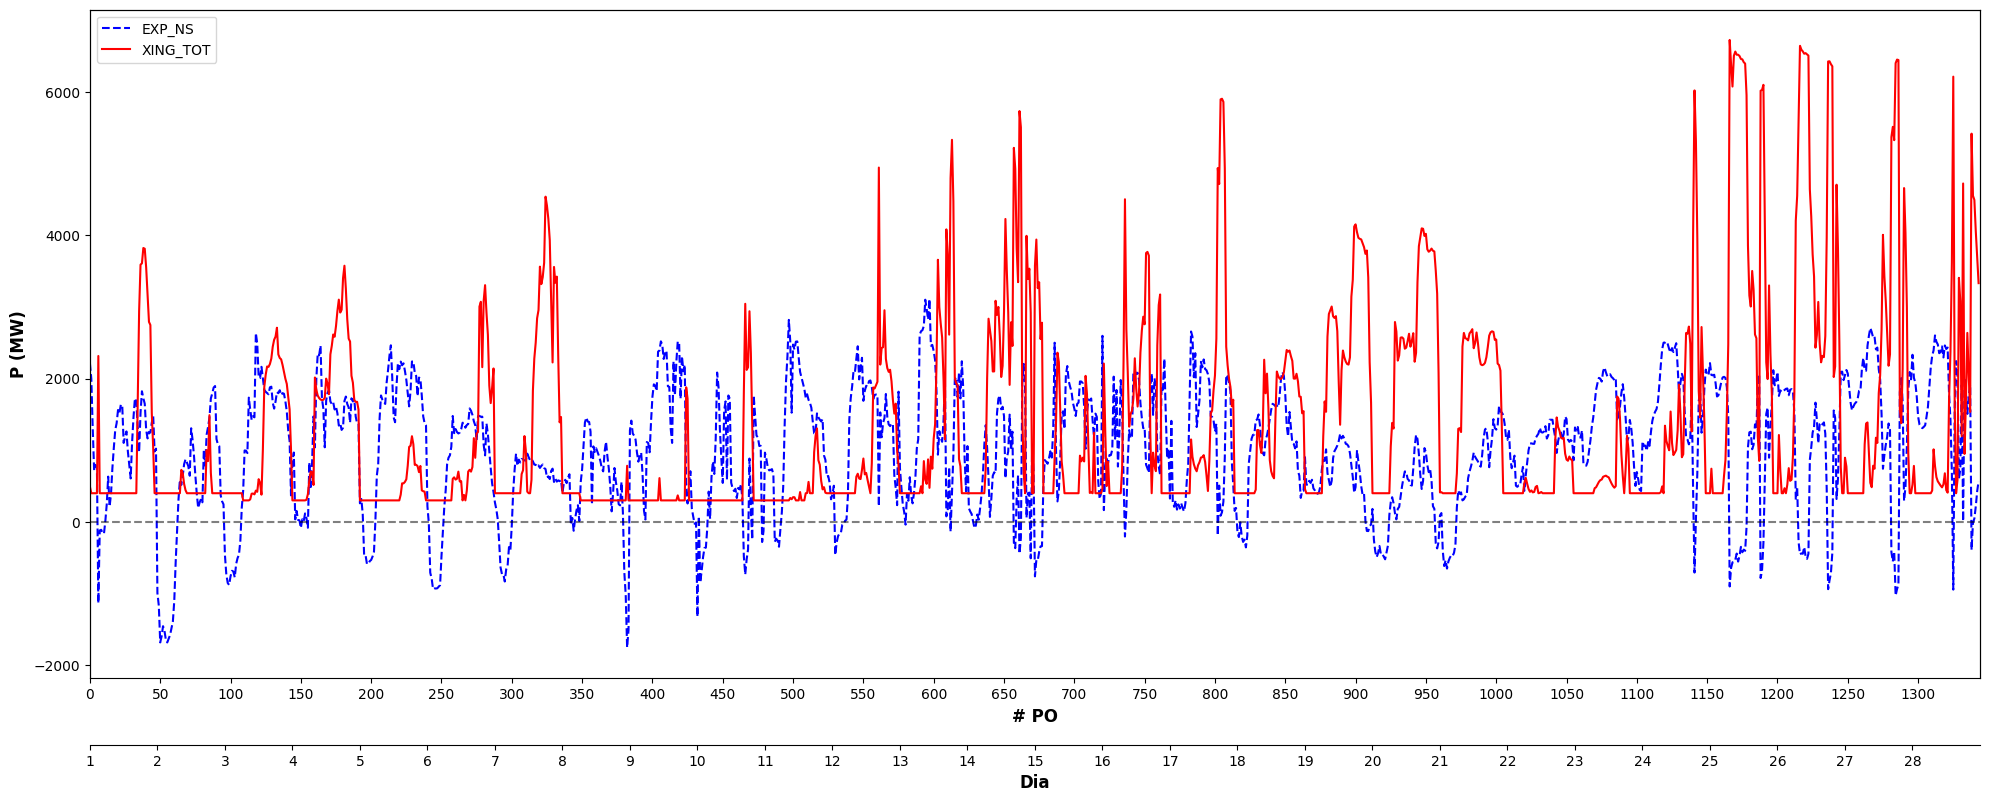

In [3]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

fig.subplots_adjust(bottom=0.2)

ax1.plot(df_total['EXP_NS'], label='EXP_NS', linestyle='--', c='blue')
ax1.plot(df_total['XING_TOT'], label='XING_TOT', linestyle='-', c='red')

ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5)
ax1.set_xticks(np.arange(0, 1500, 50))
ax1.set_xlim(0, 1344)
ax1.set_ylabel("P (MW)", fontsize=12, weight='bold')
ax1.set_xlabel("# PO", fontsize=12, weight='bold')
ax1.legend()

def tick_function(X):
    return [f"{z}" for z in X]

# AX 2
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.1))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
new_tick_locations = np.arange(1, 29)
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlim(1, 29)
ax2.set_xlabel("Dia", fontsize=12, weight='bold')
#ax2.set_title(f'{col} FNS', fontsize=15, weight='bold')

plt.tight_layout()
plt.show()


# Persistency Curve

In [57]:
def persistency_curve(dataset, col=None, frm=None, to=None):
    ano = 2022
    fig, axes = plt.subplots(figsize=(12, 6))

    x = np.sort(np.array(dataset[col]))
    N = len(x)

    y = np.linspace(1, N, N)
    
    N_cases = N

    cant_impt = len(dataset[dataset[col] < 0])
    cant_expt = len(dataset[dataset[col] > 0])
    importing = round((cant_impt / N_cases) * 100, 2)
    exporting = round((cant_expt / N_cases) * 100, 2)
            
    axes.set_xlim(0, N+10)

    plt.plot(y, x, lw=4)
    axes.set_ylabel('P (MW)', weight='bold', fontsize=14) 

    axes.set_title(fr'P. Curve {frm}$\rightarrow${to}', weight='bold', fontsize=20)
    axes.xaxis.set_label_position('top')
    axes.set_xlabel(f'Import: {importing}% (-) | Export: {exporting}% (+)', weight='bold', fontsize=15, color='red')
    
    axes.axhline(y=0, color='r', linestyle='--')

    axes.tick_params(color='black', labelcolor='black')
    for spine in axes.spines.values():
        spine.set_edgecolor('gray')

    # percentage below -1000
    #data_less_1000 = len(dataset[dataset[col] <= -1000])
    #percentage = round((data_less_1000 / N_cases) * 100, 2)
    #print(f'# OP < -1000: {data_less_1000} | {percentage}%')

    #axes.suptitle(fr'P. Curve {frm}$\rightarrow${to}')
    
    axes.grid(True, alpha=0.5)

    plt.savefig(f'results/PC/PC_{col}_{ano}.png')
    plt.show()

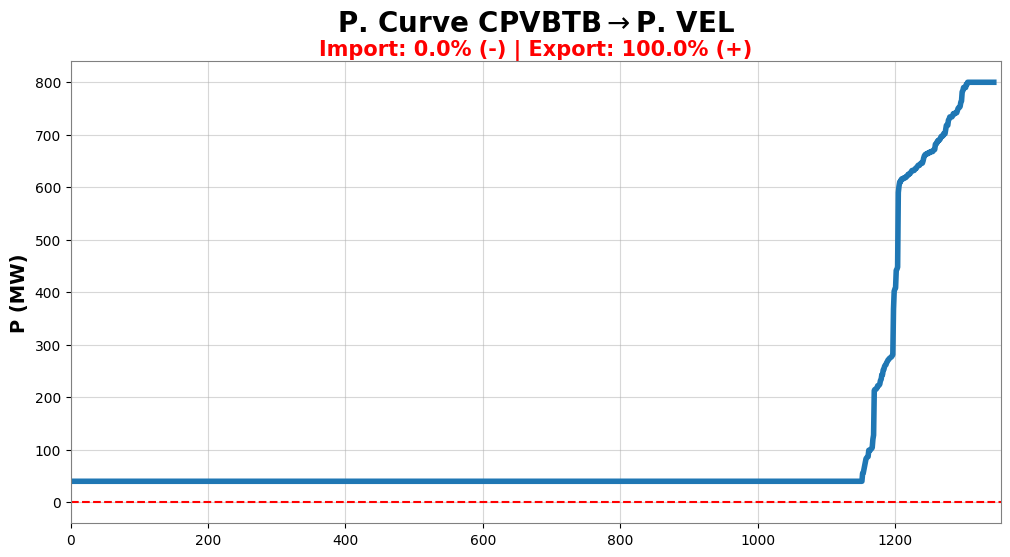

In [68]:
persistency_curve(df_total, 'CPVPVL_MW', 'CPVBTB', 'P. VEL')

# Heatmaps

In [ ]:
def flow_heatmap(dataset, col=None, frm=None, to=None, center=None):
    n_days = len(sorted(list(set(dataset['Dia'])))) # 28 days (October)
    days = list(set(dataset['Dia']))
    half_hour_list = sorted(list(set(dataset['Hora'])))
    n_half_hour = len(half_hour_list)
    half_hour_periods = pd.date_range(start='2023-10-17', periods=n_half_hour, freq='30T').strftime('%H:%M')

    active_power = np.array(dataset[col]).reshape(n_days, -1)
    heatmap_data = pd.DataFrame(active_power[::-1], index=range(n_days, 0, -1), columns=half_hour_periods)    

    vmax = dataset[col].max()
    vmin = dataset[col].min()
    
    colors = [[0, 'blue'],
          [- vmin / (vmax - vmin), 'white'],
          [(1 - vmin)/ (vmax - vmin), 'white'],
          [1, 'red']]
       
    if vmin >= 0 or (vmin <= 0 and vmax <= 0):
      cmap = sns.diverging_palette(230, 10, as_cmap=False)
    else:
      cmap = LinearSegmentedColormap.from_list('', colors) 
       

    n = 2
    
    plt.figure(figsize=(12, 6))
    
    sns.heatmap(heatmap_data, cmap=cmap, center=center, 
                xticklabels=n, cbar_kws={'label': f'{col}'}, 
                linewidths=0.1, linecolor="white", mask=heatmap_data == 0.0)     

    plt.xticks(rotation=45)

    plt.xlabel('Half Hour Period', weight='bold')
    plt.ylabel('Day of the Month', weight='bold')
    plt.title(fr'{frm}$\rightarrow${to}', 
              weight='bold', fontsize=22, x=0.5, y=1.03)

    if col == 'MW:From-To':
      plt.annotate(fr'$Max. value:$ {round(vmax, 2)} MW',
                  xy=(10, 0.005))
      plt.annotate(fr'$Min. value:$ {round(vmin, 2)} MW',
                  xy=(25, 0.005))
    
      
    elif col == 'Mvar:From-To':
      plt.annotate(fr'$Max. value:$ {round(vmax, 2)} MVAr',
                  xy=(10, 0.005))
      plt.annotate(fr'$Min. value:$ {round(vmin, 2)} MVAr',
                  xy=(25, 0.005))

    #plt.savefig(f'MW/{}/MW_HeatMap_{frmstr}_{tostr}.png')

    plt.show()